<a href="https://colab.research.google.com/github/wkdalsgh192/Crawling/blob/master/NewsCrawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Set a time period to crawl data

In [0]:
import datetime as dt

days_range = []
start = dt.datetime.strptime("2019-09-01", "%Y-%m-%d")
end = dt.datetime.strptime("2019-09-23", "%Y-%m-%d")
date_generated = [start + dt.timedelta(days = x) for x in range(0, (end - start).days)]

for date in date_generated:
  days_range.append(date.strftime("%Y%m%d"))

print(days_range)

['20190901', '20190902', '20190903', '20190904', '20190905', '20190906', '20190907', '20190908', '20190909', '20190910', '20190911', '20190912', '20190913', '20190914', '20190915', '20190916', '20190917', '20190918', '20190919', '20190920', '20190921', '20190922']


#Define HTML Parser

In [0]:
!pip install bs4

In [0]:
import requests
from bs4 import BeautifulSoup

def get_bs_obj(url):
  result = requests.get(url)
  bs_obj = BeautifulSoup(result.content, "html.parser")

  return bs_obj

In [0]:
from tqdm import tqdm_notebook
import re

total_list = []

def clean_text(text):
  cleaned_text = re.sub('\s+', '', text)
  return cleaned_text

for date in tqdm_notebook(days_range):
  page_list = [0]
  #페이지 수 찾기
  for page_number in range(1, 500):
    news_arrange_url = "https://news.naver.com/main/list.nhn?mode=LS2D&sid2=269&sid1=100&mid=shm"
    news_list_date_page_url = news_arrange_url + "&date=" + str(date) + "&page=" + str(page_number)

    #get bs_obj
    bs_obj = get_bs_obj(news_list_date_page_url)
  
    paging = bs_obj.select("div.paging > strong")
    page = int(paging[0].get_text())
    page_list.append(page)

    if (len(page_list) > 10) & (page_list[page_number] == page_list[page_number - 1]):
      break

  title_list = []
  date_list = []
  press_list = []
  final_list = []  
  
  for page in tqdm_notebook(range(1, len(page_list)-1)):
    news_list_url = "https://news.naver.com/main/list.nhn?mode=LS2D&sid2=269&sid1=100&mid=shm"
    news_title_date_page_url = news_list_url + "&date=" + str(date) + "&page=" + str(page)

    #get bs_obj
    news_obj = get_bs_obj(news_title_date_page_url)
        
    #Print out the news titles
    newsis = news_obj.select("dt")
    photos = news_obj.select("dt.photo")
    times = news_obj.select("dd")
    press = news_obj.select("dd > span.writing")

    #중복 타이틀 제거
    for photo in photos:
      newsis.remove(photo)
    newsis = newsis
    
    # 제목 리스트 만들기  
    for news, time, pres in zip(newsis, times, press):
      total_list.append([clean_text(news.get_text()), date, pres.text])

# Make a dataframe and convert it to a csv file
import pandas as pd

naver_news = pd.DataFrame(total_list, columns = ['title', 'date', 'press'])
naver_news.to_csv("/content/gdrive/My Drive/Crawling/naver_news.csv", index = False)




In [4]:
#!/usr/bin/python
# coding=cp949

#Open the saved file
import pandas as pd
df_news = pd.read_csv("/content/gdrive/My Drive/Crawling/naver_news.csv")

#Find the news containing a subword
news = df_news[df_news['title'].str.contains('조국', regex = True)]
print(df_news.shape)
print('\'조국\' takes ', str(round(news.shape[0]/ df_news.shape[0]*100, 2)) + '%', 'in total news')

(34302, 3)
'조국' takes  36.86% in total news


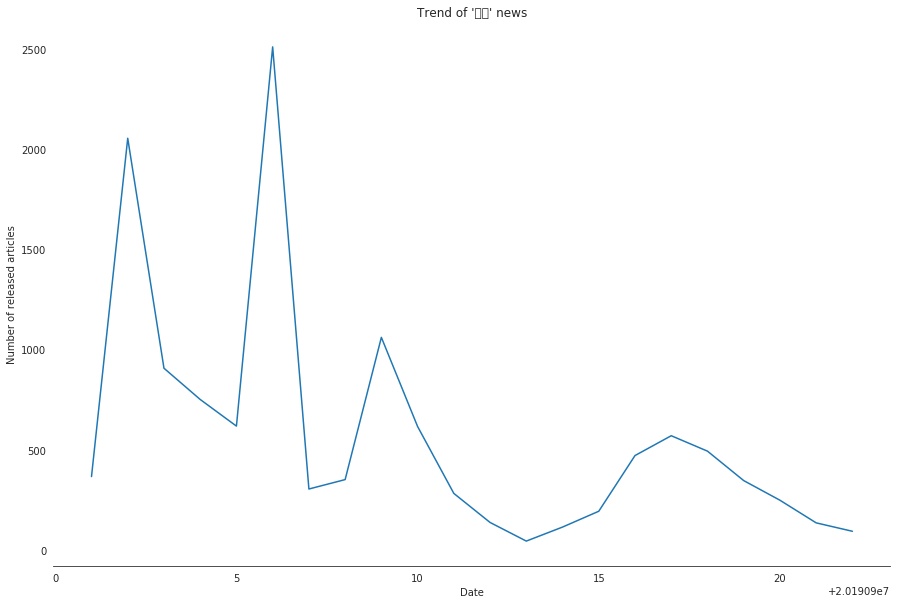

In [8]:
#!/usr/bin/python
# coding=cp949

#날짜별 조국 뉴스 기사 변화

df_news['count'] = df_news['title'].str.contains('조국', regex = 1)
df_news.head()
df_date = pd.DataFrame(df_news.groupby('date')['count'].sum()).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
fig = plt.figure(figsize = (15, 10))
ax = sns.lineplot(x = 'date', y = 'count', data = df_date); ax.set_xlabel("Date"); ax.set_ylabel("Number of released articles"); ax.set_title("Trend of \'조국\' news")

sns.despine(left = True)

In [0]:
#신문사별 조국 뉴스 기사 변화
df_press = pd.DataFrame(df_news.groupby('press')['count'].sum())
df_press.sort_values('count', axis = 0, ascending = False, inplace = True)
df_press

,count
press,
뉴시스,2528.0
연합뉴스,2145.0
머니S,520.0
세계일보,427.0
KBS,425.0
머니투데이,400.0
중앙일보,363.0
노컷뉴스,359.0
아시아경제,347.0
